## Titanic data pre processing and visualization

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [105]:
# loading the data set
train_data = pd.read_csv('C:\\Users\\HP User\\Desktop\\Titanic\\train.csv')
test_data = pd.read_csv('C:\\Users\\HP User\\Desktop\\Titanic\\test.csv')
gender_sub = pd.read_csv('C:\\Users\\HP User\\Desktop\\Titanic\\gender_submission.csv')

In [106]:
#test data
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
#train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#gender data
gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Visualizing and pre processing the training  data

In [6]:
#describing the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#columns of the data
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#data type of each column
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#counting the missing values
columns = train_data.columns
for col in columns:
    null_values = train_data[col].isnull().sum()
    print(col,null_values)

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


#### The columns age and cabin contains the more missing values

### insights from above data
#### The target variable is survived
#### For target variable prediction we do not need the columns named passenger Id,name,ticket
#### For cabin there are more missing values so we can remove that column
#### Age and embarked has less missing values soe we can impute them
#### Pclass,SibSp,Parch and fare does not have missing values
#### We can also create the new column total family size from the columns Sibsp,Parch

## Visualization of Survived variable

In [10]:
survived_bar=train_data.Survived.value_counts()

Text(0,0.5,'Passengers Count')

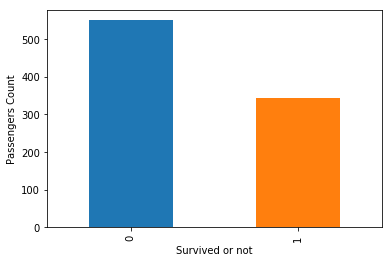

In [11]:
#plotting the graph
survived_bar.plot('bar')
plt.xlabel('Survived or not')
plt.ylabel('Passengers Count')

In [12]:
#for p class 
pclass_bar = train_data['Pclass'].value_counts().sort_index()
pclass_bar
#as majority of them are from 3 rd class

1    216
2    184
3    491
Name: Pclass, dtype: int64

Text(0,0.5,'Survived Probability')

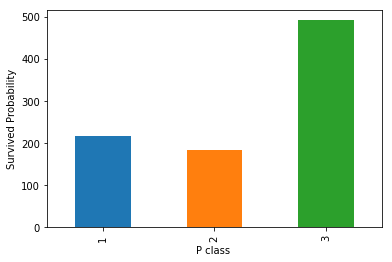

In [13]:
plt=pclass_bar.plot('bar')
plt.set_xlabel('P class ')
plt.set_ylabel('Survived Probability')

In [14]:
# to find the total number of survived people on the grouping of p class
train_data[['Pclass','Survived']].groupby('Pclass').count()
#here we can find that 3rd class has more survival rate

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
train_data[['Pclass','Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


#### P class Survived probability

In [16]:
plt = train_data[['Pclass','Survived']].groupby('Pclass').mean()
plt #calculating the mean values

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Text(0,0.5,'Survived probability')

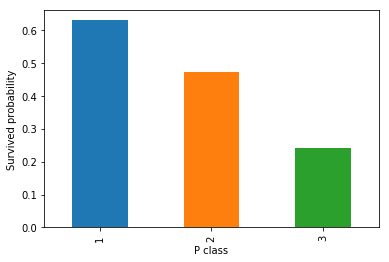

In [17]:
#plotting the graph
prob_graph = plt.Survived.plot('bar')
prob_graph.set_xlabel('P class')
prob_graph.set_ylabel("Survived probability")

#### From the above graph we can say that 1st class high survived probability

### SEX

In [18]:
plt = train_data['Sex'].value_counts().sort_index()

Text(0,0.5,'Passenger Count')

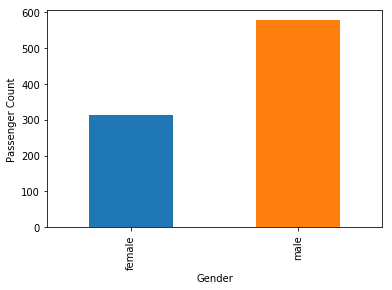

In [19]:
plt = plt.plot('bar')
plt.set_xlabel('Gender')
plt.set_ylabel('Passenger Count')

#### Sex survived probality

In [20]:
plt = train_data[['Sex','Survived']].groupby('Sex').mean()
plt

,Survived
Sex,
female,0.742038
male,0.188908


Text(0,0.5,'Survival Probability')

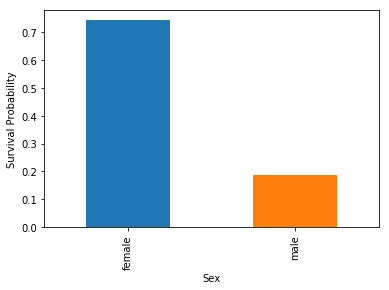

In [21]:
plot = plt.Survived.plot('bar')
plot.set_xlabel('Sex')
plot.set_ylabel('Survival Probability')

##### As we seen that Survival probalitiy is high for female

### Embarked

In [22]:
em_bar = train_data['Embarked'].value_counts().sort_index()
em_bar
#most of them are from southampton

C    168
Q     77
S    644
Name: Embarked, dtype: int64

Text(0,0.5,'Passenger Count')

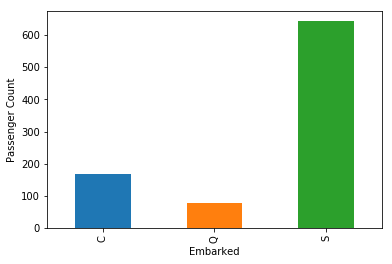

In [23]:
plt = em_bar.plot('bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Passenger Count')

Text(0,0.5,'Survived Probability')

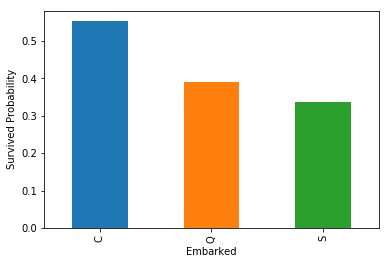

In [24]:
plt = train_data[['Embarked','Survived']].groupby('Embarked').mean()
plot = plt.Survived.plot('bar')
plot.set_xlabel('Embarked')
plot.set_ylabel('Survived Probability')

#### C>Q>S

### SibSp Siblings or Spouse

In [25]:
plt = train_data['SibSp'].value_counts()
plt

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0,0.5,'Passenger Count')

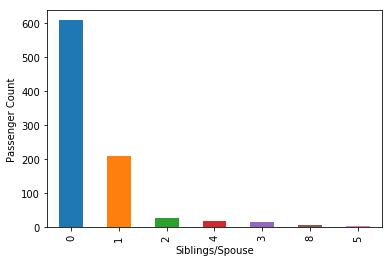

In [26]:
plt = plt.plot('bar')
plt.set_xlabel('Siblings/Spouse')
plt.set_ylabel('Passenger Count')

Text(0,0.5,'Survival Probability')

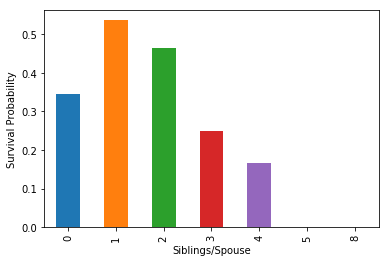

In [27]:
#survived Probability
plt = train_data[['SibSp','Survived']].groupby('SibSp').mean()
plot = plt.Survived.plot('bar')
plot.set_xlabel('Siblings/Spouse')
plot.set_ylabel('Survival Probability')

#### The passengers having one sibling/spouse has more survival probability 1>2>0>3>4

## Parch- parents/children

In [28]:
plt = train_data['Parch'].value_counts().sort_index()
plt

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

Text(0,0.5,'Passenger Count')

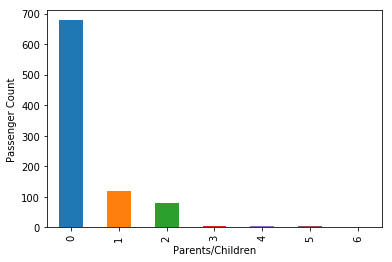

In [29]:
plt = plt.plot('bar')
plt.set_xlabel('Parents/Children')
plt.set_ylabel('Passenger Count')

In [30]:
plt1 = train_data[['Parch','Survived']].groupby('Survived').mean()
plt1

,Parch
Survived,
0,0.329690
1,0.464912


Text(0,0.5,'Survival Probability')

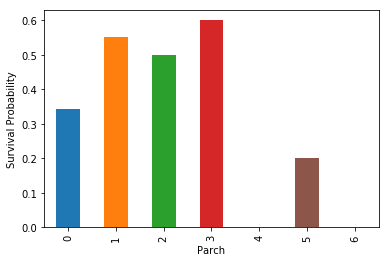

In [31]:
plt = train_data[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot('bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

#### The passengers having three children/parents has more survival probability.
'3' > '1' > '2' > '0' > '5'

## Now we will compare with two variable bi variate analysis
### Embarked vs Pclass

C:\Users\HP User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


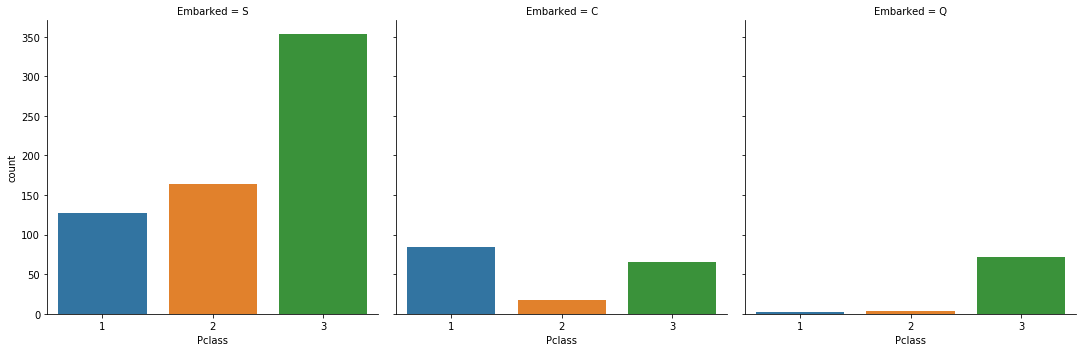

In [32]:
sns.factorplot('Pclass',col='Embarked',data=train_data,kind='count')

### Pclass Vs Sex

C:\Users\HP User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


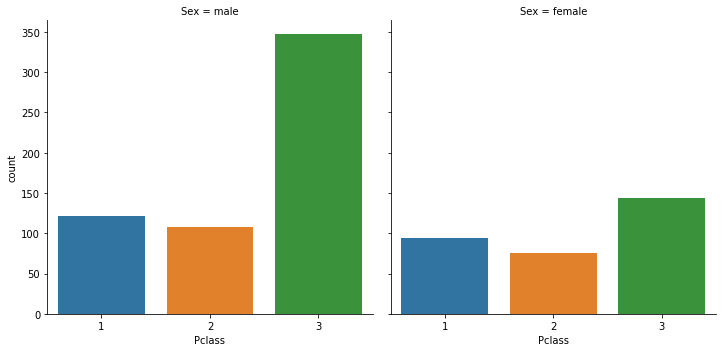

In [33]:
sns.factorplot('Pclass',col='Sex',data=train_data,kind='count')

#### From the above graph We can see that majority of the class has male passengers. but the survived probabilty is high fro female

### Embarked Vs Sex

C:\Users\HP User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


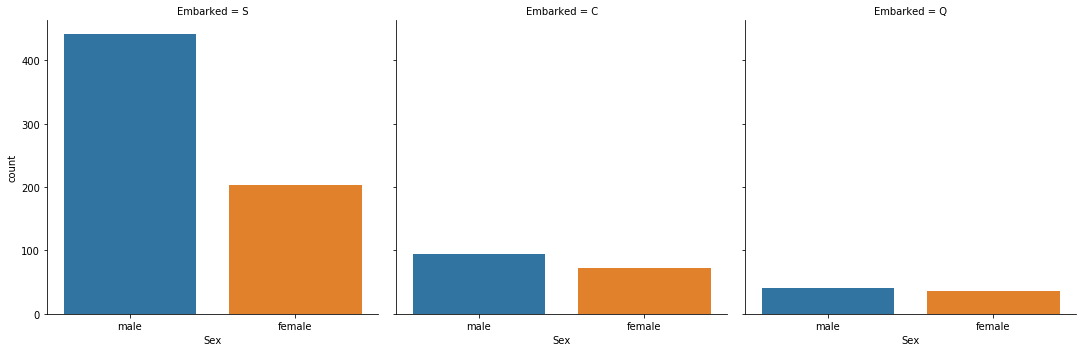

In [34]:
sns.factorplot('Sex',col='Embarked',data=train_data,kind='count')

## Now we are creating a new column name total family size from sibsp and parch

In [108]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
train_data['Familysize'] = train_data['SibSp']+train_data['Parch']+1

In [110]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Now we are removing the unnecessary columns

In [111]:
#we can remove the ticket and passenge id and also remove the cabin column as it has more missing vlaues
train_data = train_data.drop(columns=['Ticket','Cabin'])

In [112]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


#### Now we are mapping the sex and embarked values into numeric

In [113]:
train_data['Sex'] = train_data['Sex'].map({'male':0,'female':1})
train_data['Embarked']=train_data['Embarked'].map({'C':0,'Q':1,'S':2})

In [114]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0,1


### Pre proceesing the name
##### Now we are extracting the name from the passenger and categoerize them
##### Drop the column name

In [115]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
train_data = train_data.drop(columns='Name')

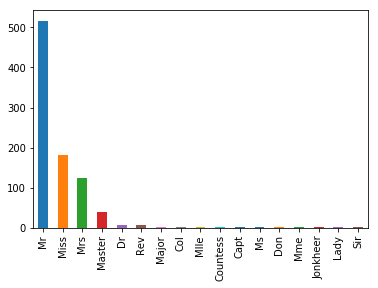

In [116]:
train_data['Title'].value_counts().plot('bar')

In [117]:
# now we are combining some groups into others as a column
train_data['Title']=train_data['Title'].replace(['Dr','Rev','Major','Countess','Col','Sir','Jonkheer','Lady','Capt','Don'],'Others')
train_data['Title'] = train_data['Title'].replace('Ms','Miss')
train_data['Title'] = train_data['Title'].replace('Mme','Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle','Miss')

Text(0,0.5,'Passenger Count')

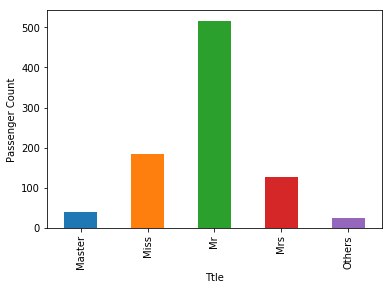

In [118]:
plt = train_data['Title'].value_counts().sort_index().plot('bar')
plt.set_xlabel('Ttle')
plt.set_ylabel('Passenger Count')

#### The passenger with Mr has more 

Text(0,0.5,'Survived Probability')

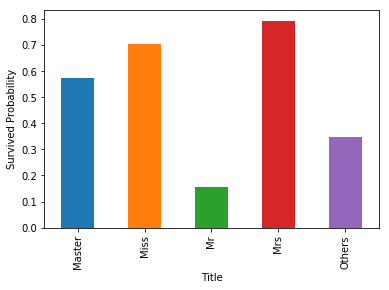

In [119]:
#surviving probability
plot = train_data[['Title','Survived']].groupby('Title').mean()
plt = plot.Survived.plot('Bar')
plt.set_xlabel('Title')
plt.set_ylabel('Survived Probability')

#### Mapping the title to numeric values

In [120]:
train_data['Title']=train_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [121]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,Title
0,1,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,2,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,3,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,4,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,5,0,3,0,35.0,0,0,8.0500,2.0,1,2


### Correlation between two columns

In [122]:
corr_matrix = train_data.corr()
import matplotlib.pyplot as plt

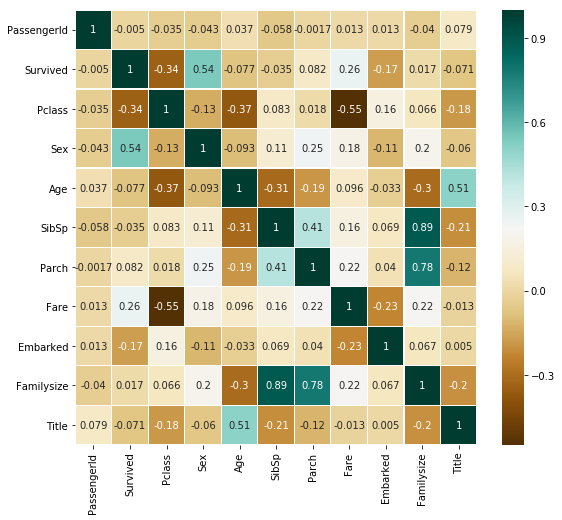

In [123]:
plt.figure(figsize=(9,8))
sns.heatmap(data=corr_matrix,cmap='BrBG',annot=True,linewidths=0.2)

#### From above graph there are no high correlated values

### Handling the missing values

In [124]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Familysize       0
Title            0
dtype: int64

In [125]:
#imputing the embarked values as there are only two missing values with its majority class
train_data['Embarked'].isnull().sum()

2

In [126]:
train_data['Embarked']=train_data['Embarked'].fillna(2)

In [127]:
train_data.head(6)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,Title
0,1,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,2,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,3,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,4,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,5,0,3,0,35.0,0,0,8.0500,2.0,1,2
5,6,0,3,0,NaN,0,0,8.4583,1.0,1,2


#### Missing values with age

In [128]:
corr_matrix = train_data[['Pclass','Sex','Age','SibSp','Parch','Fare']].corr()

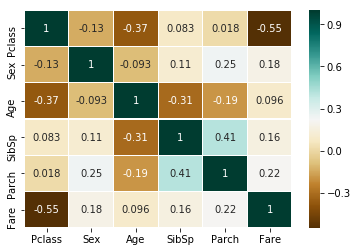

In [129]:
sns.heatmap(data=corr_matrix,cmap='BrBG',annot=True,linewidths=0.2)

Age is not correlated with 'Sex' and 'Fare'. So, we don't consider these two columns while imputing 'Sex'.
'Pclass', 'SibSp' and 'Parch' are negatively correlated with 'Sex'.
Let's fill Age with the median age of similar rows from 'Pclass', 'SibSp' and 'Parch'. 
If there are no similar rows, fill the age with the median age of total dataset.

In [130]:
Nan_index = train_data['Age'][train_data['Age'].isnull()].index

In [131]:
for i in Nan_index:
    age_prediction = train_data['Age'][((train_data.SibSp==train_data.iloc[i]['SibSp']) & (train_data.Parch
                                                                                          ==train_data.iloc[i]['Parch']) & 
                                        (train_data.Pclass==train_data.iloc[i]['Pclass']))].median()
    if not np.isnan(age_prediction):
        train_data['Age'].iloc[i]=age_prediction
    else:
        train_data['Age'].iloc[i]=train_data['Age'].median()

C:\Users\HP User\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [132]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Familysize     0
Title          0
dtype: int64

As there are no missing values

In [133]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,Title
0,1,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,2,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,3,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,4,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,5,0,3,0,35.0,0,0,8.0500,2.0,1,2


## Preprocessing the Test data

In [134]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [135]:
#now we are dropping the cabin,ticket and pasenger Id
test_data = test_data.drop(columns=['Ticket','Cabin'])

In [136]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [137]:
#converting the sex ,embarked to numeric values
test_data['Sex'] = test_data['Sex'].map({'male':0,'female':1})
test_data['Embarked']=test_data['Embarked'].map({'C':0,'Q':1,'S':2})

In [138]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,2


In [139]:
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
test_data = test_data.drop(columns='Name')

In [140]:
# extracting the title from name and convert into numerical values
test_data['Title']=test_data['Title'].replace(['Dr','Rev','Major','Countess','Col','Sir','Jonkheer','Lady','Capt','Don'],'Others')
test_data['Title'] = test_data['Title'].replace('Ms','Miss')
test_data['Title'] = test_data['Title'].replace('Mme','Mrs')
test_data['Title'] = test_data['Title'].replace('Mlle','Miss')

In [141]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,1,Mr
1,893,3,1,47.0,1,0,7.0000,2,Mrs
2,894,2,0,62.0,0,0,9.6875,1,Mr
3,895,3,0,27.0,0,0,8.6625,2,Mr
4,896,3,1,22.0,1,1,12.2875,2,Mrs


In [142]:
test_data['Title']=test_data['Title'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Others':4})

In [143]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,1,2.0
1,893,3,1,47.0,1,0,7.0000,2,3.0
2,894,2,0,62.0,0,0,9.6875,1,2.0
3,895,3,0,27.0,0,0,8.6625,2,2.0
4,896,3,1,22.0,1,1,12.2875,2,3.0


In [144]:
#counting the missing values
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           1
dtype: int64

In [145]:
Nan_index = test_data['Age'][test_data['Age'].isnull()].index

In [146]:
for i in Nan_index:
    age_prediction = train_data['Age'][((train_data.SibSp==test_data.iloc[i]['SibSp']) & (train_data.Parch==test_data
                                                                                         .iloc[i]['Parch']) &
                                       (test_data.Pclass == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_prediction):
        test_data['Age'].iloc[i]=age_prediction
    else:
        test_data['Age'].iloc[i]=train_data['Age'].median()

C:\Users\HP User\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Imputing Title with its mode

In [147]:
title_mode = train_data.Title.mode()[0]
test_data.Title = test_data.Title.fillna(title_mode)

### Imputing Fare with its mean

In [148]:
fare_mean = train_data.Fare.mean()
test_data.Fare = test_data.Fare.fillna(fare_mean)

### Creating the new column name family size with columns Sibsp and Parch

In [149]:
test_data['familysize'] = test_data['SibSp']+test_data['Parch']+1

In [150]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,familysize
0,892,3,0,34.5,0,0,7.8292,1,2.0,1
1,893,3,1,47.0,1,0,7.0000,2,3.0,2
2,894,2,0,62.0,0,0,9.6875,1,2.0,1
3,895,3,0,27.0,0,0,8.6625,2,2.0,1
4,896,3,1,22.0,1,1,12.2875,2,3.0,3


In [151]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
familysize     0
dtype: int64

#### As there are no missing values

## Splitting the training data and test data

In [152]:
train_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.266184,0.523008,0.381594,32.204208,1.536476,1.904602,1.895623
std,257.353842,0.486592,0.836071,0.477990,13.321984,1.102743,0.806057,49.693429,0.791503,1.613459,0.788465
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,2.000000,1.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,2.000000,2.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,11.000000,4.000000


In [153]:
#from sklearn.utils import shuffle
#train_data1 = shuffle(train_data)

In [154]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,Title
0,1,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,2,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,3,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,4,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,5,0,3,0,35.0,0,0,8.0500,2.0,1,2


In [155]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,Title
0,1,0,3,0,22.0,1,0,7.2500,2.0,2,2
1,2,1,1,1,38.0,1,0,71.2833,0.0,2,3
2,3,1,3,1,26.0,0,0,7.9250,2.0,1,1
3,4,1,1,1,35.0,1,0,53.1000,2.0,2,3
4,5,0,3,0,35.0,0,0,8.0500,2.0,1,2
5,6,0,3,0,26.0,0,0,8.4583,1.0,1,2
6,7,0,1,0,54.0,0,0,51.8625,2.0,1,2
7,8,0,3,0,2.0,3,1,21.0750,2.0,5,0
8,9,1,3,1,27.0,0,2,11.1333,2.0,3,3
9,10,1,2,1,14.0,1,0,30.0708,0.0,2,3


In [156]:
X_Train = train_data.drop(columns='Survived')
y_train = train_data.Survived
y_train = pd.DataFrame({'Survived':y_train.values})

In [157]:
X_Train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Familysize,Title
0,1,3,0,22.0,1,0,7.2500,2.0,2,2
1,2,1,1,38.0,1,0,71.2833,0.0,2,3
2,3,3,1,26.0,0,0,7.9250,2.0,1,1
3,4,1,1,35.0,1,0,53.1000,2.0,2,3
4,5,3,0,35.0,0,0,8.0500,2.0,1,2


In [158]:
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [159]:
X_test = test_data

#### Decision Tree

In [160]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,accuracy_score,cohen_kappa_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [161]:
#prediction = train_data.loc[:,'Pclass':'Title']

In [162]:
#target = train_data['Survived']

In [163]:
train_x,test_x,train_y,test_y = train_test_split(X_Train,y_train,test_size=0.3,random_state=1234)
tree_model = DecisionTreeClassifier()
tree_model.fit(X=X_Train,y=y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [164]:
#train_x.shape,train_y.shape

In [165]:
#train_x.head()

In [166]:
#train_y.head()

In [167]:
#prediction.shape

In [168]:
#cross_val_score(estimator=tree_model,X=train_x,y=train_y,cv=3,n_jobs=-1)

In [169]:
#predict_test  = tree_model.predict(test_x)

In [189]:
prediction=tree_model.predict(test_x)
prediction

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0], dtype=int64)

In [190]:
accuracy_score(test_y,prediction)

1.0

In [191]:
confusion_matrix(test_y,prediction)

array([[166,   0],
       [  0, 102]], dtype=int64)

In [193]:
prediction1=tree_model.predict(test_data)
prediction1

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,

# GRID SEARCH:

In [174]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [175]:
tree=DecisionTreeClassifier()

In [176]:
#give gridparameters
grid_param={'max_depth':[3,4,5,6,7],'criterion':['gini','entropy']}

In [177]:
grid_serach_model=GridSearchCV(tree,param_grid=grid_param,scoring='roc_auc',n_jobs=1)

In [178]:
grid_serach_model.fit(X_Train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [179]:
final_model = grid_serach_model.best_estimator_
final_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
cross_val_score(final_model,X_Train,y_train, cv=5, scoring='roc_auc').mean()

0.7962315356573786

In [181]:
grid_serach_model.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [185]:
pred_final=pd.DataFrame(prediction1,columns=['Survived'])
pred_final.to_csv('C:\\Users\\HP User\\Desktop\\out2.csv')